In [1]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

In [2]:
labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

In [3]:
data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
feature = data[ ['Sepal length','Sepal width','Petal length','Petal width']]
feature.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# 1. Hierarchical Clustering

In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

- linkage : https://kr.mathworks.com/help/stats/linkage.html

C:\Users\john\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Users\john\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


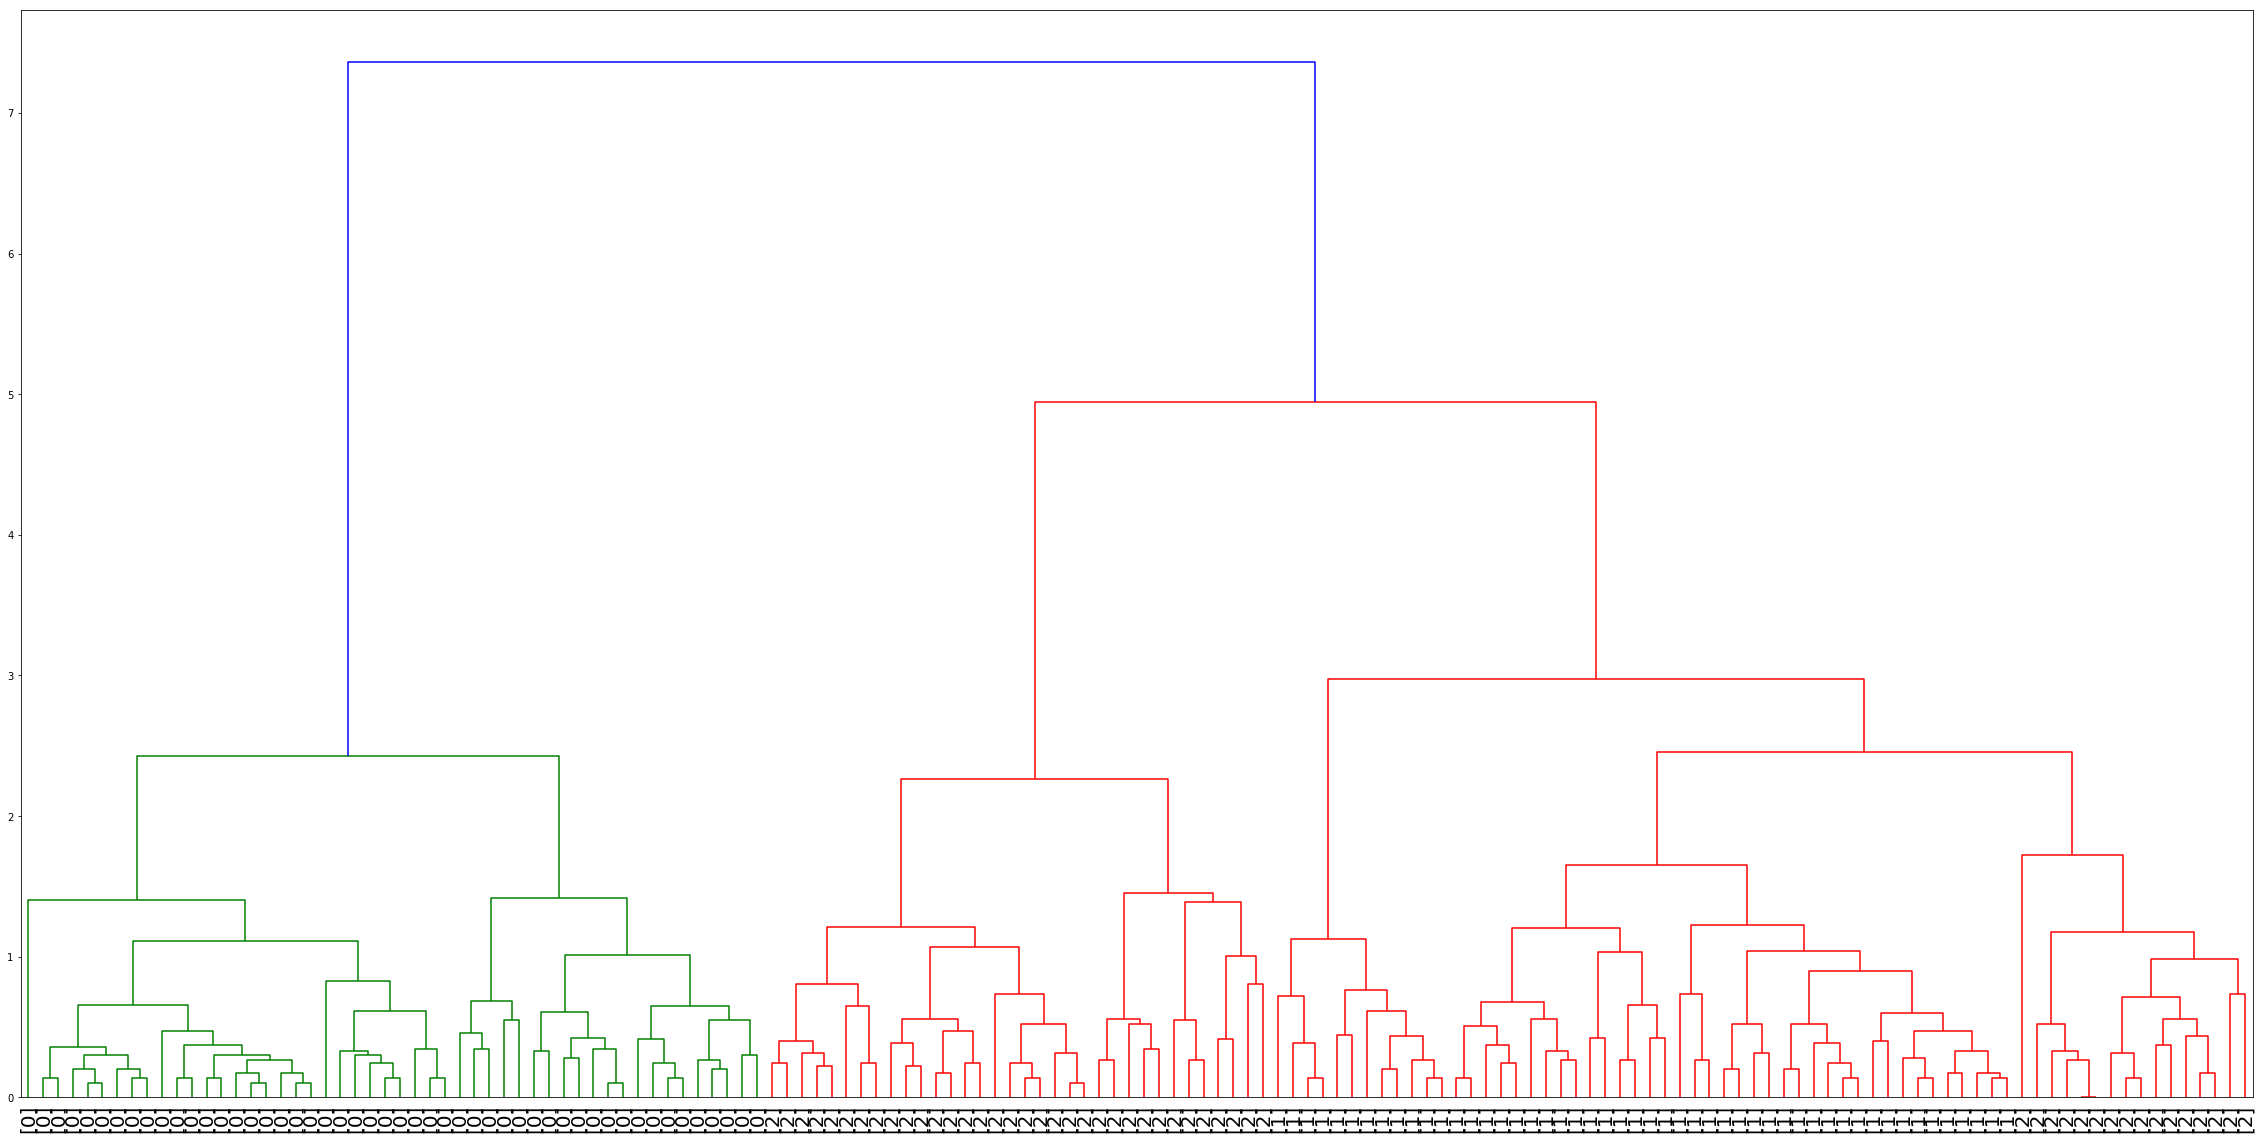

In [6]:
# MAX(Complete Link)으로 군집-군집 or 군집-개체 간 거리 계산 
links = linkage(data,method='complete')

# Plot the dendrogram
plt.figure(figsize=(40,20))
dendrogram(links,
           labels = labels.as_matrix(columns=['labels']),
           leaf_rotation=90,
           leaf_font_size=20,
)
plt.show()

In [7]:
# 교차 분석 결과  
from scipy.cluster.hierarchy import fcluster

predict = pd.DataFrame(fcluster(links,3,criterion='distance'))
predict.columns=['predict']
ct = pd.crosstab(predict['predict'],labels['labels'])
print(ct)

labels    0   1   2
predict            
1        50   0   0
2         0   0  34
3         0  50  16


# 2. K-Means Clustering

- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

In [9]:
#K-Means 군집 분석 
model = KMeans(n_clusters=4,algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

# predict 추가 
r = pd.concat([feature,predict],axis=1)

print(r)

     Sepal length  Sepal width  Petal length  Petal width  predict
0             5.1          3.5           1.4          0.2        1
1             4.9          3.0           1.4          0.2        1
2             4.7          3.2           1.3          0.2        1
3             4.6          3.1           1.5          0.2        1
4             5.0          3.6           1.4          0.2        1
5             5.4          3.9           1.7          0.4        1
6             4.6          3.4           1.4          0.3        1
7             5.0          3.4           1.5          0.2        1
8             4.4          2.9           1.4          0.2        1
9             4.9          3.1           1.5          0.1        1
10            5.4          3.7           1.5          0.2        1
11            4.8          3.4           1.6          0.2        1
12            4.8          3.0           1.4          0.1        1
13            4.3          3.0           1.1          0.1     

In [10]:
# K-Means++ 이용

'''
model = KMeans(n_clusters=4,init='k-means++',algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

# predict 추가 
r = pd.concat([feature,predict],axis=1)

print(r)
'''

"\nmodel = KMeans(n_clusters=4,init='k-means++',algorithm='auto')\nmodel.fit(feature)\npredict = pd.DataFrame(model.predict(feature))\npredict.columns=['predict']\n\n# predict 추가 \nr = pd.concat([feature,predict],axis=1)\n\nprint(r)\n"

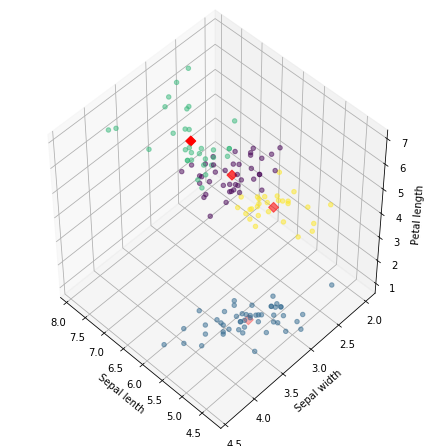

In [11]:
# 각 군집의 중심점 
centers = pd.DataFrame(model.cluster_centers_,columns=['Sepal length','Sepal width','Petal length','Petal width'])
center_x = centers['Sepal length']
center_y = centers['Sepal width']
center_z = centers['Petal length']

from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['Sepal length'],r['Sepal width'],r['Petal length'],c=r['predict'],alpha=0.5)
ax.scatter(center_x,center_y,center_z,s=50,marker='D',c='r')
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()

In [12]:
#각 군집별 갯수 확인 
ct = pd.crosstab(data['labels'],r['predict'])
print (ct)

predict   0   1   2   3
labels                 
0         0  50   0   0
1        23   0   0  27
2        17   0  32   1


### 최적의 군집 수 k 결정 (elbow point 이용)

Text(0.5, 1.0, 'Elbow curve')

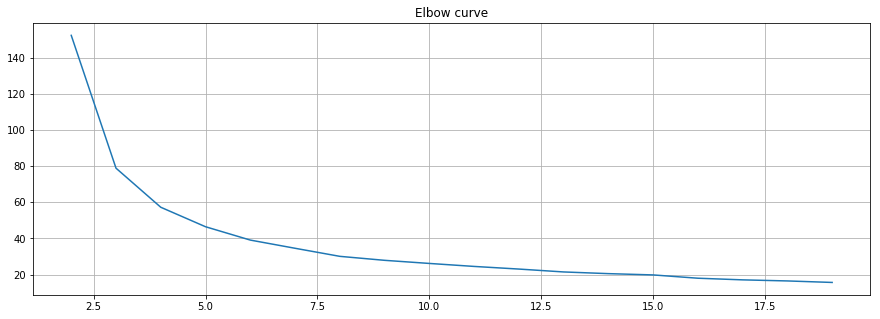

In [13]:
X = feature
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

### 데이터 표준화 

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
model = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler,model)
pipeline.fit(feature)
predict = pd.DataFrame(pipeline.predict(feature))
predict.columns=['predict']

# predict값 추가 
r = pd.concat([feature,predict],axis=1)

# 교차분석 결과 
ct = pd.crosstab(data['labels'],r['predict'])
print (ct)

predict   0   1   2
labels             
0         0  50   0
1        39   0  11
2        14   0  36


# 3. DBSCAN

- http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [15]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

In [16]:
model = DBSCAN(eps=0.3,min_samples=6)

predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

print(r)

     Sepal length  Sepal width  Petal length  Petal width  predict
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
5             5.4          3.9           1.7          0.4       -1
6             4.6          3.4           1.4          0.3        0
7             5.0          3.4           1.5          0.2        0
8             4.4          2.9           1.4          0.2        0
9             4.9          3.1           1.5          0.1        0
10            5.4          3.7           1.5          0.2        0
11            4.8          3.4           1.6          0.2        0
12            4.8          3.0           1.4          0.1        0
13            4.3          3.0           1.1          0.1     

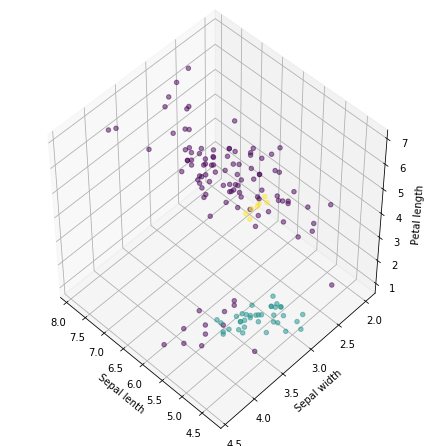

In [17]:
from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['Sepal length'],r['Sepal width'],r['Petal length'],c=r['predict'],alpha=0.5)
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()

In [18]:
#교차분석 결과 확인 
ct = pd.crosstab(data['labels'],r['predict'])
print (ct)

predict  -1   0   1
labels             
0        13  37   0
1        43   0   7
2        50   0   0


In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


scaler = StandardScaler()
model = DBSCAN(min_samples=6)
pipeline = make_pipeline(scaler,model)
predict = pd.DataFrame(pipeline.fit_predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

ct = pd.crosstab(data['labels'],r['predict'])
print (ct)

predict  -1   0   1   2   3
labels                     
0         7  43   0   0   0
1        13   0  31   6   0
2        22   0  10   0  18
